Group:
  HAYAGREEVA KUMAR DESINENI (hd324)
  SAI ABHILASH BOJJA  (sb2667)

In [4]:
import numpy as np
import pandas as pd
import os


In [5]:
from google.colab import files

uploaded = files.upload()

Saving item_categories.csv to item_categories.csv
Saving items.csv to items (1).csv
Saving sales_train.csv to sales_train (1).csv
Saving shops.csv to shops.csv
Saving test.csv to test.csv


In [6]:
test = pd.read_csv('/content/test.csv')
item_categories = pd.read_csv('/content/item_categories.csv')
items = pd.read_csv('/content/items.csv')
shops = pd.read_csv('/content/shops.csv')
sales = pd.read_csv('/content/sales_train.csv',  parse_dates=['date'], infer_datetime_format=True, dayfirst=True)

In [ ]:
print(sales.head())
print('____________________________')
print(sales.info())
print('____________________________')
print(sales.describe())

        date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-01-02               0       59    22154      999.00           1.0
1 2013-01-03               0       25     2552      899.00           1.0
2 2013-01-05               0       25     2552      899.00          -1.0
3 2013-01-06               0       25     2554     1709.05           1.0
4 2013-01-15               0       25     2555     1099.00           1.0
____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB
None
____________________________
       date_block_num       

In [7]:
print(test.head())
print('____________________________')
print(test.info())
print('____________________________')
print(test.describe())

   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None
____________________________
                  ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.000000
25%     53549.750000      16.000000    5381.500000
50%    107099.500000      34.500000   11203.000000
75%    160649.250000      47.000000   16071.500000
max    214199.000000      59.000000   22167.000000


In [8]:
print(items.head())
print('____________________________')
print(items.info())
print('____________________________')
print(items.describe())

                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
____________________________
           item_id  item

In [9]:
print(shops.head())
print('____________________________')
print(shops.info())
print('____________________________')
print(shops.describe())

                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
____________________________
         shop_id
count  60.000000
mean   29.500000
std    17.464249
min     0.000000
25%    14.750000
50%    29.500000
75%    44.250000
max    59.000000


In [10]:
print(item_categories.head())
print('____________________________')
print(item_categories.info())
print('____________________________')
print(item_categories.describe())

        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
____________________________
       item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.000000


In [11]:
print(shops.head())
print('____________________________')
print(shops.info())
print('____________________________')
print(shops.describe())

                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
____________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
____________________________
         shop_id
count  60.000000
mean   29.500000
std    17.464249
min     0.000000
25%    14.750000
50%    29.500000
75%    44.250000
max    59.000000


In [12]:
df_item=pd.merge(items,item_categories,on='item_category_id',how='inner')
sales_train=pd.merge(sales,shops,on='shop_id',how='inner')
sales=pd.merge(sales_train,df_item,on='item_id',how='inner')

In [13]:
sales = sales[sales['shop_id'].isin(test['shop_id'].unique())]
sales = sales[sales['item_id'].isin(test['item_id'].unique())]

In [14]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-02,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-03,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935361,2015-10-29,33,55,12733,1490.0,1.0,Цифровой склад 1С-Онлайн,"КОМПАС-3D V16 Home эл. лиц. 1 год [PC, Цифрова...",76,Программы - Для дома и офиса (Цифра)
2935362,2015-10-28,33,55,12733,1490.0,1.0,Цифровой склад 1С-Онлайн,"КОМПАС-3D V16 Home эл. лиц. 1 год [PC, Цифрова...",76,Программы - Для дома и офиса (Цифра)
2935391,2015-10-28,33,55,1819,1499.0,3.0,Цифровой склад 1С-Онлайн,"Batman: Рыцарь Аркхема. Premium Edition [PC, Ц...",31,Игры PC - Цифра
2935392,2015-10-29,33,55,1819,1499.0,1.0,Цифровой склад 1С-Онлайн,"Batman: Рыцарь Аркхема. Premium Edition [PC, Ц...",31,Игры PC - Цифра


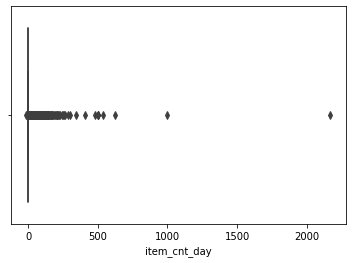

In [15]:
import seaborn as sns
sns.boxplot(x=sales.item_cnt_day)

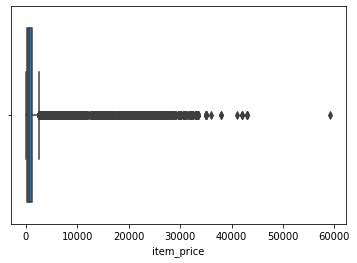

In [16]:
import seaborn as sns
sns.boxplot(x=sales.item_price)

In [18]:
sales = sales[(sales.item_price < 300000 )& (sales.item_cnt_day < 1000)]
sales = sales[sales.item_price > 0].reset_index(drop = True)

In [19]:
sales = sales.groupby(["date_block_num","shop_id","item_id"])[['date_block_num','date', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']].agg({"date_block_num":'mean',"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

In [20]:
sales

date_block_num       date             \
                                         mean        min        max   
date_block_num shop_id item_id                                        
0              2       33                 0.0 2013-01-05 2013-01-05   
                       482                0.0 2013-01-16 2013-01-16   
                       491                0.0 2013-01-09 2013-01-09   
                       839                0.0 2013-01-22 2013-01-22   
                       1007               0.0 2013-01-11 2013-01-25   
...                                       ...        ...        ...   
33             59      22087             33.0 2015-10-05 2015-10-23   
                       22088             33.0 2015-10-03 2015-10-27   
                       22091             33.0 2015-10-03 2015-10-03   
                       22100             33.0 2015-10-18 2015-10-18   
                       22102             33.0 2015-10-16 2015-10-16   

                               item_price item_cnt_day  
                                     mean          sum  
date_block_num shop_id item_id                          
0              2       33           499.0          1.0  
                       482         3300.0          1.0  
                       491          600.0          1.0  
                       839         3300.0          1.0  
                       1007         449.0          3.0  
...                                   ...          ...  
33             59      22087        119.0          6.0  
                       22088        119.0          2.0  
                       22091        179.0          1.0  
                       22100        629.0          1.0  
                       22102       1250.0          1.0  

[600158 rows x 5 columns]

In [21]:
sales = sales.item_cnt_day.apply(list).reset_index()

In [22]:
sales

,date_block_num,shop_id,item_id,sum
0,0,2,33,1.0
1,0,2,482,1.0
2,0,2,491,1.0
3,0,2,839,1.0
4,0,2,1007,3.0
...,...,...,...,...
600153,33,59,22087,6.0
600154,33,59,22088,2.0
600155,33,59,22091,1.0
600156,33,59,22100,1.0


In [23]:
sales_data = pd.merge(test,sales,on = ['item_id','shop_id'],how = 'left')

In [24]:
sales_data.fillna(0,inplace = True)
sales_data.drop(['shop_id','item_id'],inplace = True, axis = 1)

In [25]:
sales_data

,ID,date_block_num,sum
0,0,20.0,1.0
1,0,22.0,1.0
2,0,23.0,2.0
3,0,24.0,2.0
4,0,28.0,1.0
...,...,...,...
702949,214197,25.0,1.0
702950,214198,0.0,0.0
702951,214199,17.0,3.0
702952,214199,18.0,1.0


In [26]:
sales_data = sales_data.pivot_table(index = 'ID', columns='date_block_num', values = 'sum', aggfunc='sum')

In [27]:
sales_data

date_block_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0
ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,1.0,1.0,1.0,3.0,1.0,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,2.0,NaN,1.0,3.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
214196,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214197,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
sales_data = sales_data.fillna(0)

In [29]:
sales_data.head(20)

date_block_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,0.0


In [30]:
X=sales_data[sales_data.columns[:-1]]

In [31]:
y=sales_data[sales_data.columns[-1]]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.20, random_state=1)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#fitting data
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error
print('Train set mse:', mean_squared_error(Y_train, regressor.predict(X_train)))
print('Test set mse:', mean_squared_error(Y_test, regressor.predict(X_test)))
print('Test set score:', regressor.score(X_train,Y_train))

Train set mse: 2.653940928177527
Test set mse: 1.824720710416844
Test set score: 0.674286039566897


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


In [35]:
#cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
ts_cross_val = TimeSeriesSplit(n_splits=5)
print('cross_val_score',cross_val_score(regressor, X, y, cv = ts_cross_val, scoring= "neg_mean_squared_error"))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

cross_val_score [-12.87072302  -4.31109114  -1.01727773  -1.45555592  -0.84898381]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


In [36]:
submission = pd.DataFrame({'ID':X_test.index,'item_cnt_month':regressor.predict(X_test)})

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


In [37]:
submission.to_csv('submission.csv',index = False)

In [38]:
#Predctions
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


In [42]:
X_train=np.arange(0,len(X_train),1)

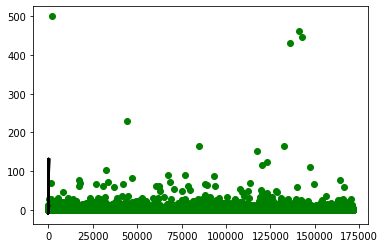

In [44]:
from matplotlib import pyplot as plt
plt.scatter(X_train, Y_train,color='g') 

plt.plot(X_test, y_pred,color='k') 



plt.show()